In [1]:
from vampires_calibration.csv_tools import read_csv,match_fits_tags
from vampires_calibration.on_sky import write_fits_info_to_csv_psf,fit_CHARIS_Mueller_matrix_by_bin_m3
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from vampires_calibration.utils import process_errors,generate_system_mueller_matrix,process_dataset,process_model
from vampires_calibration.fitting import model
from vampires_calibration.plotting import plot_data_and_model
from vampires_calibration.constants import wavelength_bins
from pyMuellerMat.physical_models.charis_physical_models import HWP_retardance, IMR_retardance,M3_diattenuation,M3_retardance
import pandas as pd
from pathlib import Path

/opt/anaconda3/envs/charisenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# try one star
# for bin in range(22):
#     df = pd.read_csv(f'datacsvs/onsky_csvs/unpol_standards_2_stars/bin{bin}.csv')
#     # remove all stars with tag 343631 in filepath
#     df = df[~df['filepath'].str.contains('343631')]
#     df.to_csv(f'datacsvs/onsky_csvs/unpol_standards_1_star/bin{bin}.csv',index=False)

In [2]:
# Plotting data with original model

filepath = Path('datacsvs/onsky_csvs/HD25532/bin2.csv')

# Read in data

interleaved_values, interleaved_stds, configuration_list = read_csv(filepath,mode='m3')
print("Interleaved Values")
print("Length: ", len(interleaved_values))
print(interleaved_values[0 : 10])
print("Interleaved Stds")
print("Length: ", len(interleaved_stds))
print(interleaved_stds[0 : 10])
print("Configuration List")
print("Length: ", len(configuration_list))
print(configuration_list[0 : 10])
print(interleaved_stds[0])

Interleaved Values
Length:  56
[ -90247.59059385 3253839.90543102 -184152.14516618 3100358.1908987
 -109843.99728428 3141096.16931325 -111585.69428613 2964548.87982759
  -75010.5704448  2809764.67642297]
Interleaved Stds
Length:  56
[2302.18387403 2302.18387403 2368.55987342 2368.55987342 1576.97465783
 1576.97465783 1373.79636338 1373.79636338 1292.45092356 1292.45092356]
Configuration List
Length:  28
[{'hwp': {'theta': 22.5}, 'image_rotator': {'theta': 85.50399}, 'altitude_rot': {'pa': 41.99246511}, 'parang_rot': {'pa': 83.87981766548525}}, {'hwp': {'theta': 67.5}, 'image_rotator': {'theta': 85.43126}, 'altitude_rot': {'pa': 41.85761247}, 'parang_rot': {'pa': 83.83396670474883}}, {'hwp': {'theta': 0.0}, 'image_rotator': {'theta': 85.34017}, 'altitude_rot': {'pa': 41.6499689}, 'parang_rot': {'pa': 83.76331306430977}}, {'hwp': {'theta': 45.0}, 'image_rotator': {'theta': 85.31183}, 'altitude_rot': {'pa': 41.59359128}, 'parang_rot': {'pa': 83.74407858219183}}, {'hwp': {'theta': 22.5}, '

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.9121e+03                                    5.46e+05    
       1              2         2.5194e+03      1.39e+03       2.68e-02       3.09e+03    
       2              3         2.5145e+03      4.94e+00       6.54e-02       1.10e+03    
       3              4         2.5051e+03      9.39e+00       1.31e-01       1.03e+03    
       4              5         2.4879e+03      1.72e+01       2.60e-01       1.25e+03    
       5              6         2.4596e+03      2.83e+01       5.15e-01       2.02e+03    
       6              7         2.4267e+03      3.29e+01       1.01e+00       2.20e+03    
       7              8         2.4215e+03      5.20e+00       5.66e-01       3.15e+02    
       8              9         2.4215e+03      9.53e-03       2.47e-02       5.44e-01    
       9             10         2.4215e+03      5.53e-09       2.43e-05       1.37e-03    

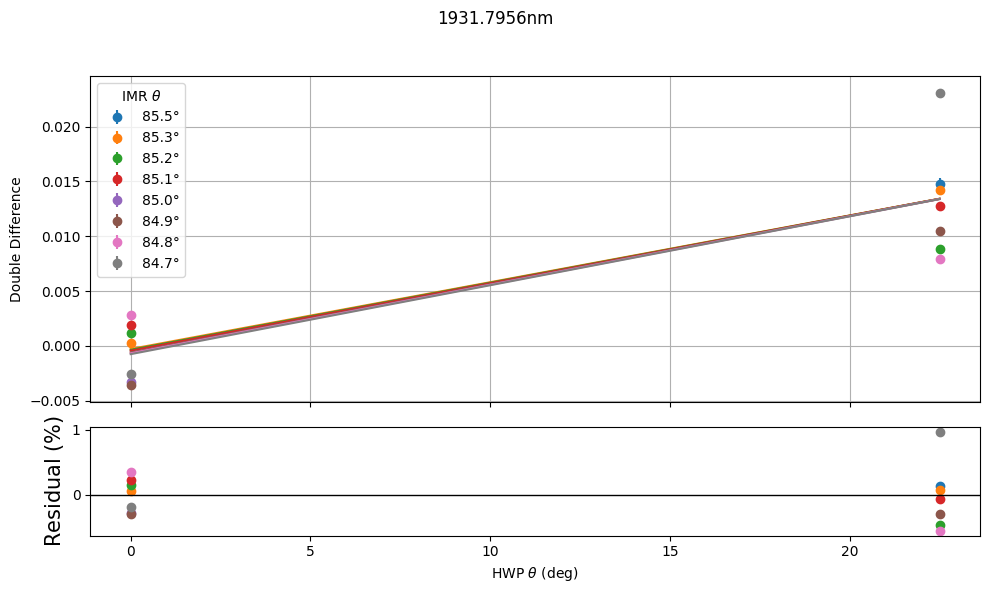

Updated Mueller Matrix:
[[ 0.50043857 -0.19512609 -0.45633917 -0.02377574]
 [-0.49687449  0.19643626  0.45964929  0.02394658]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.551504105599088 0.9682196722900427
Error: [1.30795587e-03 2.50483220e+00]
s_res: 0.4230755540042846


/var/folders/2v/qmxm7kj51fg6kf7g36xrbysr0000gn/T/ipykernel_1418/2050289960.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


In [4]:
# fit diattenuation
# test minimization

# Test fitting with the wavelength bin we plotted earlier

error,fig2, ax2,sres = fit_CHARIS_Mueller_matrix_by_bin_m3(filepath, 15, 
    Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/unpol_imr_diat_fit/test.json'),
    )
ax2.tick_params(
    axis='x',
    direction='in',
    top=True,
    which='both',  
)
ax2.tick_params(
    axis='y',
    direction='in',
    right=True,
    which='both',
)
ax2.minorticks_on()
fig2.suptitle('')
fig2.show()
#fig2.savefig('/Users/thomasmcintosh/Desktop/CHARIS-REU/overleaf_plots/naive_model_single_diff_vs_hwp_1329.png',bbox_inches='tight', dpi=600)



   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.2312e+03                                    2.88e+05    
       1              2         1.8874e+03      3.44e+02       4.94e-02       7.84e+02    
       2              3         1.8849e+03      2.51e+00       1.00e-01       3.41e+02    
       3              4         1.8811e+03      3.75e+00       2.00e-01       2.34e+02    
       4              5         1.8785e+03      2.58e+00       3.44e-01       1.42e+02    
       5              6         1.8785e+03      1.51e-03       8.29e-03       7.91e-02    
       6              9         1.8785e+03      1.23e-11       1.20e-06       3.11e-03    
       7             10         1.8785e+03      1.96e-11       3.14e-07       3.47e-03    
`ftol` termination condition is satisfied.
Function evaluations 10, initial cost 2.2312e+03, final cost 1.8785e+03, first-order optimality 3.47e-03.
     message: `ftol` termination

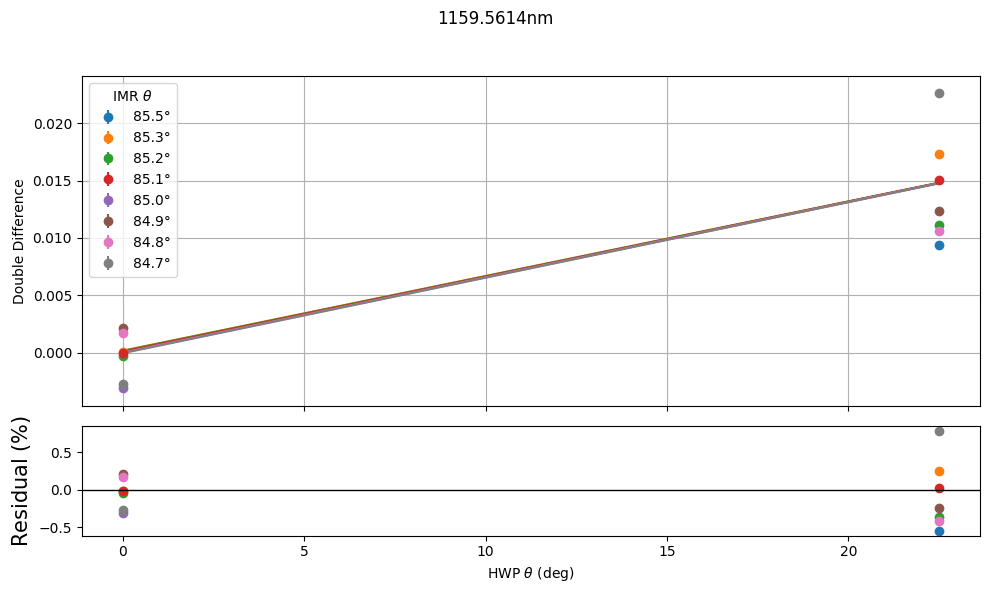

Updated Mueller Matrix:
[[ 0.49991545 -0.10184564 -0.46836715  0.1420392 ]
 [-0.49991545  0.10184564  0.46836715 -0.1420392 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.544670673152568 0.7864198386267556
Error: [1.07913339e-03 1.86534416e+00]
s_res: 0.3805579548330439
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.7995e+03                                    4.24e+05    
       1              2         9.8086e+02      8.19e+02       4.67e-02       2.74e+03    
       2              3         9.6315e+02      1.77e+01       9.74e-02       2.67e+03    
       3              4         9.2912e+02      3.40e+01       1.94e-01       2.51e+03    
       4              5         8.6642e+02      6.27e+01       3.86e-01       3.74e+03    
       5              6         7.6192e+02      1.04e+02       7.61e-01       6.15e+03    
       6

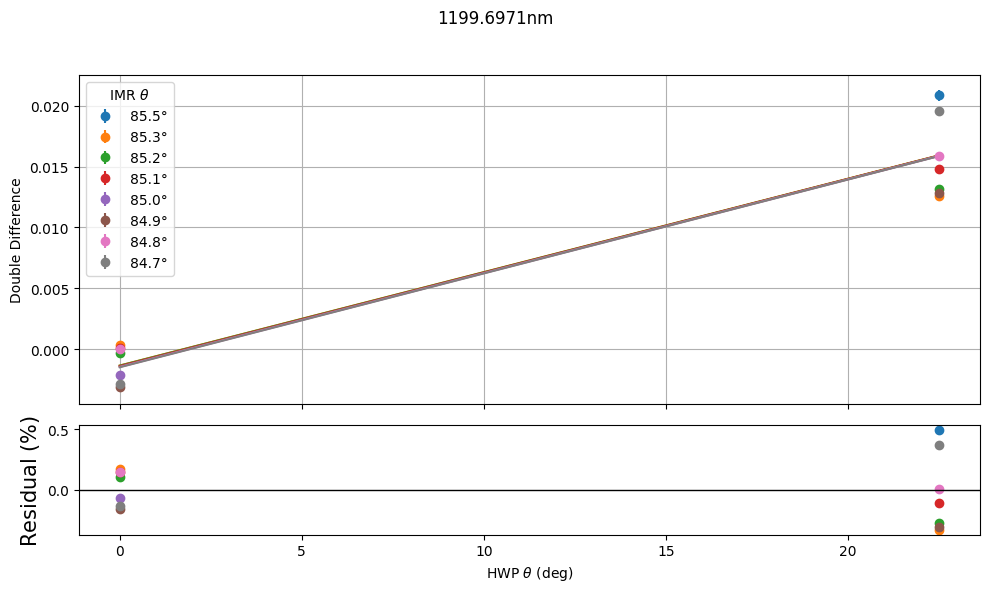

Updated Mueller Matrix:
[[ 0.5006312  -0.08884707 -0.47078104  0.13123496]
 [-0.49673953  0.0894166   0.47449025 -0.13226574]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.33068689862246514 0.49179088644735414
Error: [6.36636556e-04 1.01146978e+00]
s_res: 0.26992510992137264
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.7396e+03                                    1.52e+05    
       1              2         2.6221e+03      1.17e+02       4.71e-02       1.60e+03    
       2              3         2.6121e+03      1.00e+01       9.47e-02       1.55e+03    
       3              4         2.5929e+03      1.92e+01       1.89e-01       1.45e+03    
       4              5         2.5579e+03      3.50e+01       3.75e-01       2.50e+03    
       5              6         2.5008e+03      5.71e+01       7.40e-01       4.01e+03    
    

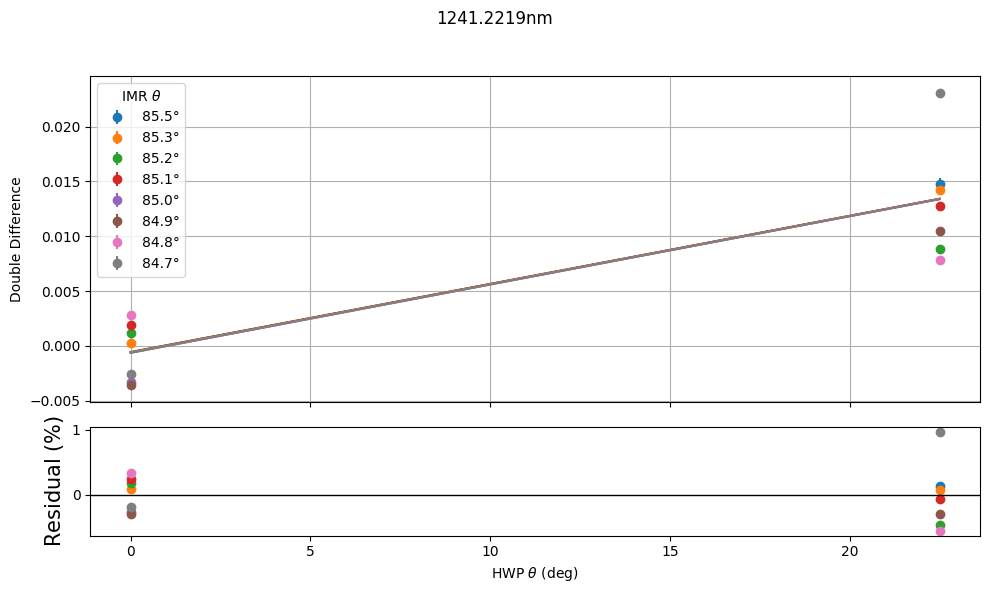

Updated Mueller Matrix:
[[ 0.50021966 -0.07370578 -0.47652312  0.12657308]
 [-0.49852508  0.07391008  0.47814929 -0.12700371]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.551114811655404 0.9685041760149269
Error: [1.32961672e-03 2.50152208e+00]
s_res: 0.42446997683309634
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.4176e+03                                    1.75e+05    
       1              2         2.2501e+03      1.68e+02       4.56e-02       1.31e+03    
       2              3         2.2421e+03      7.98e+00       9.20e-02       1.27e+03    
       3              4         2.2269e+03      1.52e+01       1.83e-01       1.18e+03    
       4              5         2.1992e+03      2.76e+01       3.65e-01       1.97e+03    
       5              6         2.1550e+03      4.42e+01       7.20e-01       3.08e+03    
       

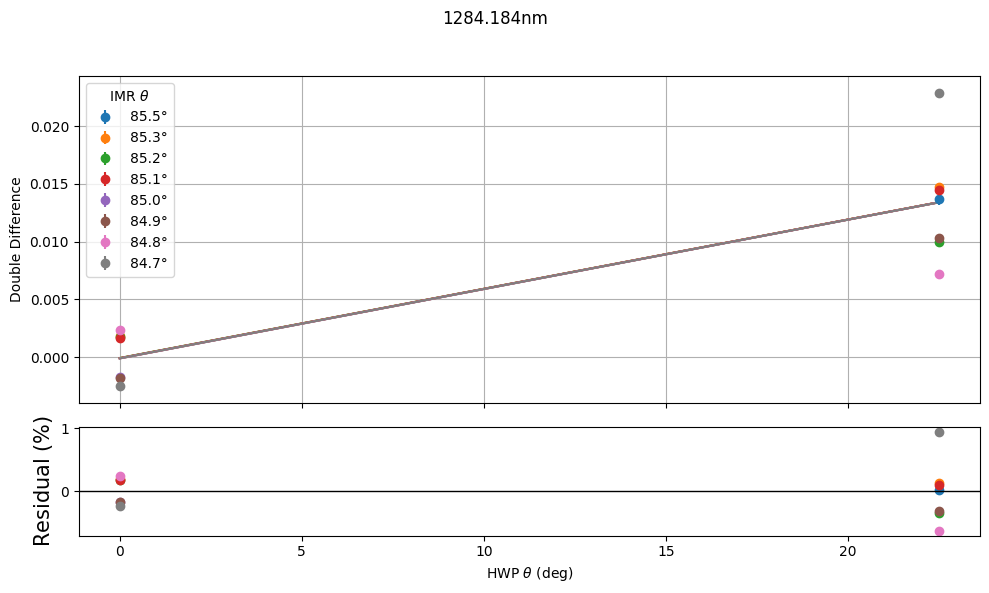

Updated Mueller Matrix:
[[ 0.49998462 -0.06275026 -0.47748482  0.10881289]
 [-0.49372908  0.06337278  0.48355473 -0.11019146]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.6219745072443839 0.945990489303937
Error: [1.30031717e-03 2.43927115e+00]
s_res: 0.4043056706301464
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.3252e+03                                    6.54e+04    
       1              2         4.2924e+03      3.28e+01       4.47e-02       2.73e+03    
       2              3         4.2762e+03      1.62e+01       8.95e-02       2.69e+03    
       3              4         4.2442e+03      3.20e+01       1.78e-01       2.61e+03    
       4              5         4.1823e+03      6.19e+01       3.55e-01       4.95e+03    
       5              6         4.0667e+03      1.16e+02       7.01e-01       9.15e+03    
       6

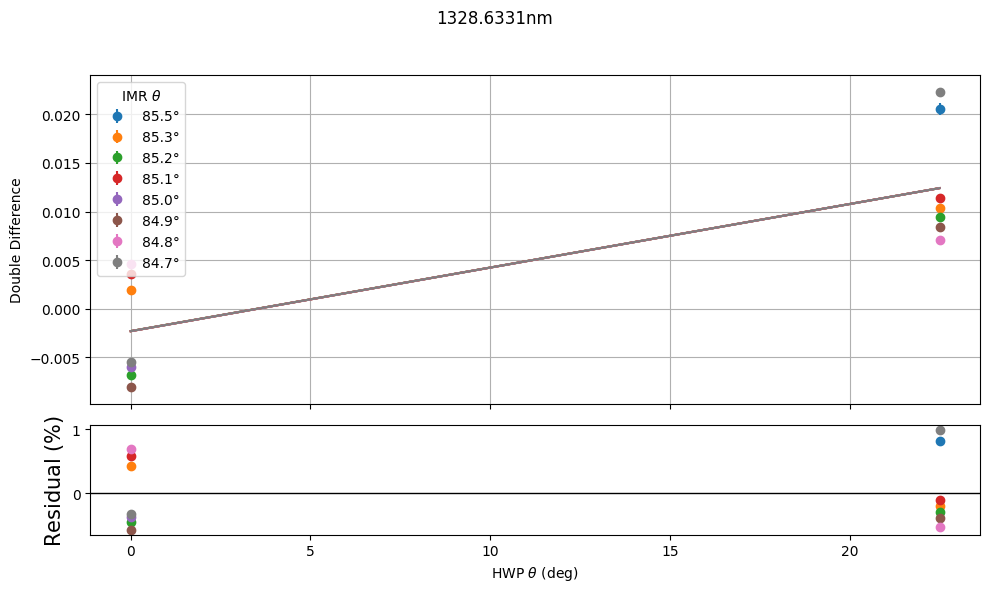

Updated Mueller Matrix:
[[ 0.50111838 -0.05544617 -0.48114713  0.0808263 ]
 [-0.49102759  0.0563264   0.49105999 -0.08249499]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.5742088435320517 0.9894458068830811
Error: [1.72588686e-03 3.47222353e+00]
s_res: 0.6028173763266004
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.5430e+04                                    4.68e+04    
       1              2         1.5408e+04      2.22e+01       4.35e-02       2.46e+03    
       2              3         1.5394e+04      1.42e+01       8.70e-02       2.42e+03    
       3              4         1.5366e+04      2.81e+01       1.73e-01       2.36e+03    
       4              5         1.5311e+04      5.47e+01       3.45e-01       4.53e+03    
       5              6         1.5207e+04      1.03e+02       6.81e-01       8.49e+03    
       

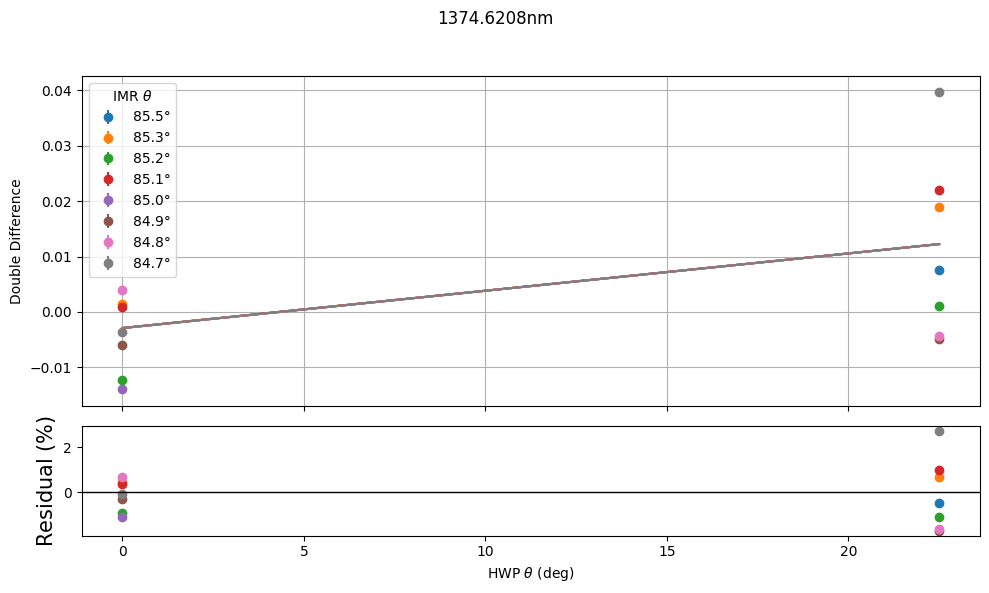

Updated Mueller Matrix:
[[ 0.50147118 -0.06207134 -0.48961061  0.0482896 ]
 [-0.4958855   0.06263193  0.49514108 -0.0488368 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -1.7164510872960905 2.737632730365115
Error: [3.87263580e-03 7.94186116e+00]
s_res: 1.314939114201391
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.5272e+03                                    2.68e+05    
       1              2         3.0256e+03      5.02e+02       4.01e-02       2.78e+03    
       2              3         3.0100e+03      1.57e+01       8.45e-02       2.74e+03    
       3              4         2.9792e+03      3.08e+01       1.69e-01       2.65e+03    
       4              5         2.9199e+03      5.93e+01       3.35e-01       3.99e+03    
       5              6         2.8099e+03      1.10e+02       6.63e-01       7.33e+03    
       6 

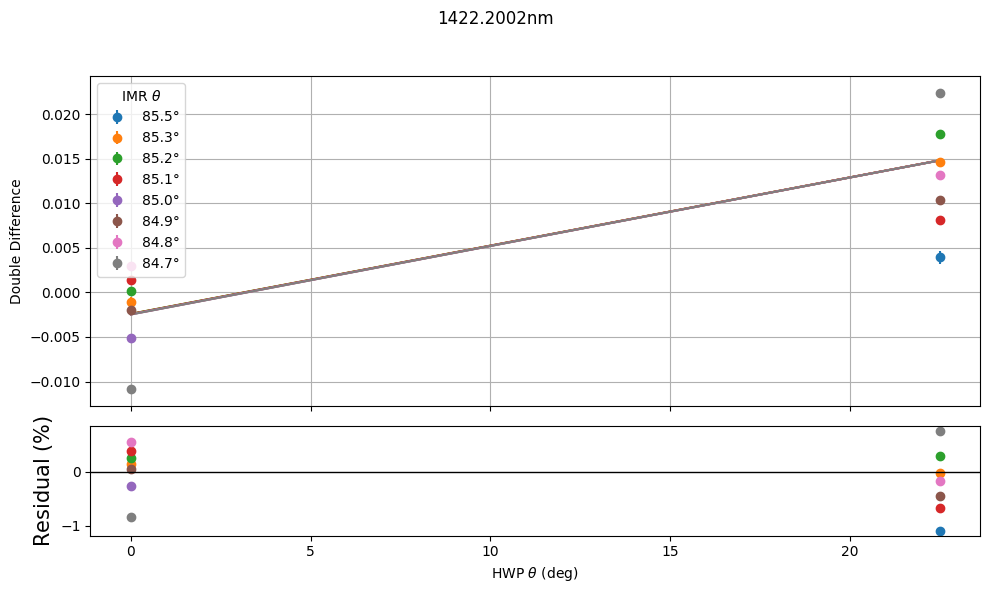

Updated Mueller Matrix:
[[ 0.50130219 -0.07744721 -0.48936577  0.02993285]
 [-0.49635854  0.07807136  0.4942607  -0.03023255]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -1.0892744017475282 0.7570407692909895
Error: [1.54262964e-03 2.60732318e+00]
s_res: 0.5884629932771231
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.0143e+03                                    7.93e+04    
       1              2         1.9638e+03      5.05e+01       4.09e-02       8.34e+02    
       2              3         1.9592e+03      4.54e+00       8.22e-02       8.13e+02    
       3              4         1.9505e+03      8.77e+00       1.64e-01       7.70e+02    
       4              5         1.9341e+03      1.63e+01       3.26e-01       1.36e+03    
       5              6         1.9062e+03      2.80e+01       6.45e-01       2.29e+03    
       

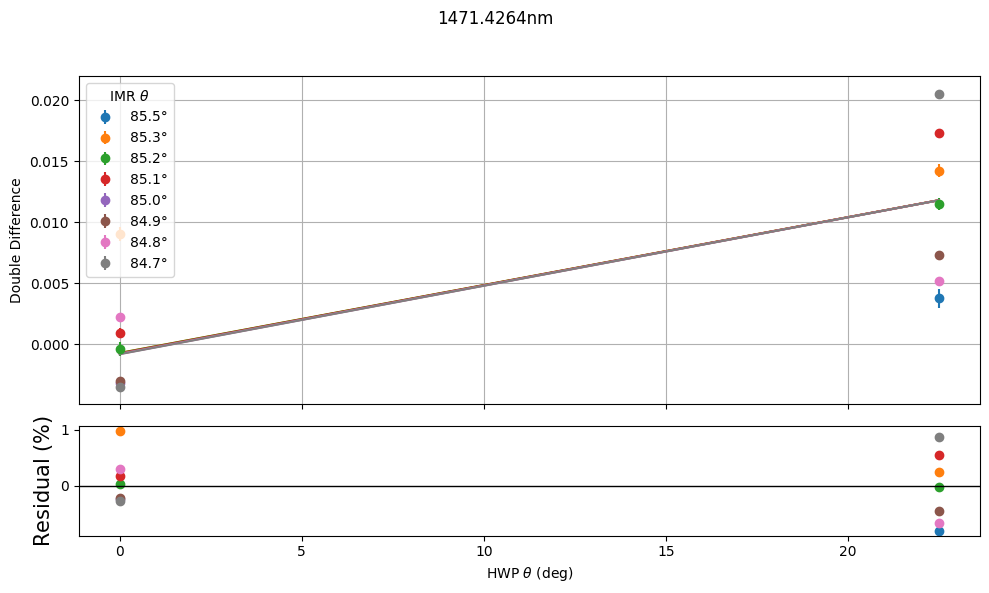

Updated Mueller Matrix:
[[ 0.50048945 -0.09406228 -0.48721569  0.01518057]
 [-0.49644408  0.09473369  0.49120303 -0.01530451]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.8039115782139157 0.9749506957551017
Error: [1.46597182e-03 3.13477160e+00]
s_res: 0.5769802342661902
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.4075e+03                                    6.94e+04    
       1              2         1.3629e+03      4.46e+01       3.97e-02       1.13e+03    
       2              3         1.3569e+03      6.02e+00       7.99e-02       1.11e+03    
       3              4         1.3451e+03      1.18e+01       1.59e-01       1.08e+03    
       4              5         1.3225e+03      2.26e+01       3.17e-01       1.93e+03    
       5              6         1.2812e+03      4.13e+01       6.27e-01       3.50e+03    
       

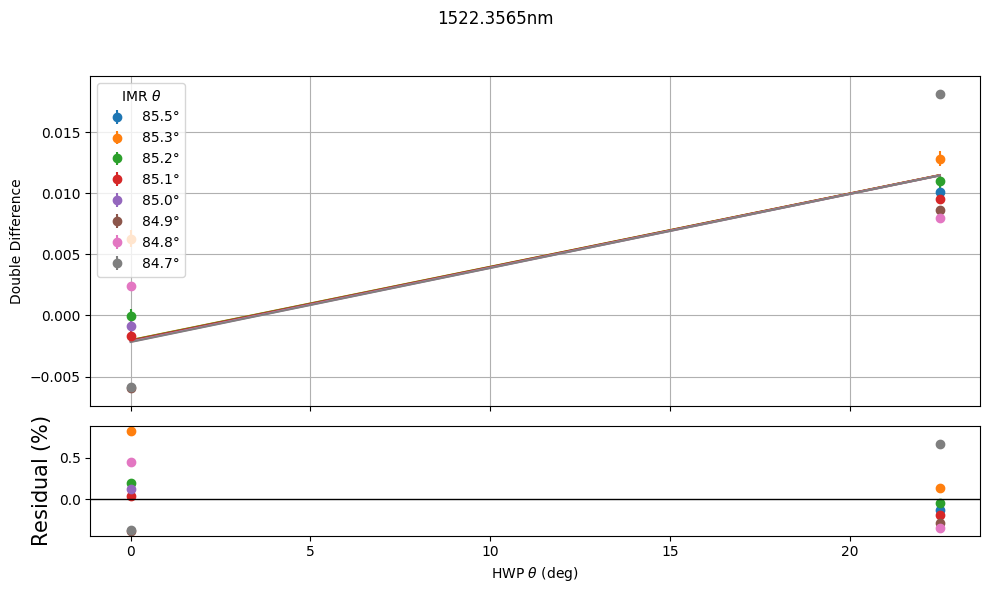

Updated Mueller Matrix:
[[ 0.50117644 -0.11345232 -0.48365116  0.00578698]
 [-0.49681262  0.11434996  0.48792135 -0.00583805]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.3817617510345711 0.8296826676804998
Error: [1.20705456e-03 2.61328331e+00]
s_res: 0.42223798218542674
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.3927e+03                                    3.16e+04    
       1              2         2.3802e+03      1.25e+01       3.84e-02       1.32e+03    
       2              3         2.3735e+03      6.77e+00       7.69e-02       1.31e+03    
       3              4         2.3601e+03      1.34e+01       1.53e-01       1.41e+03    
       4              5         2.3339e+03      2.62e+01       3.05e-01       2.74e+03    
       5              6         2.2837e+03      5.02e+01       6.04e-01       5.19e+03    
      

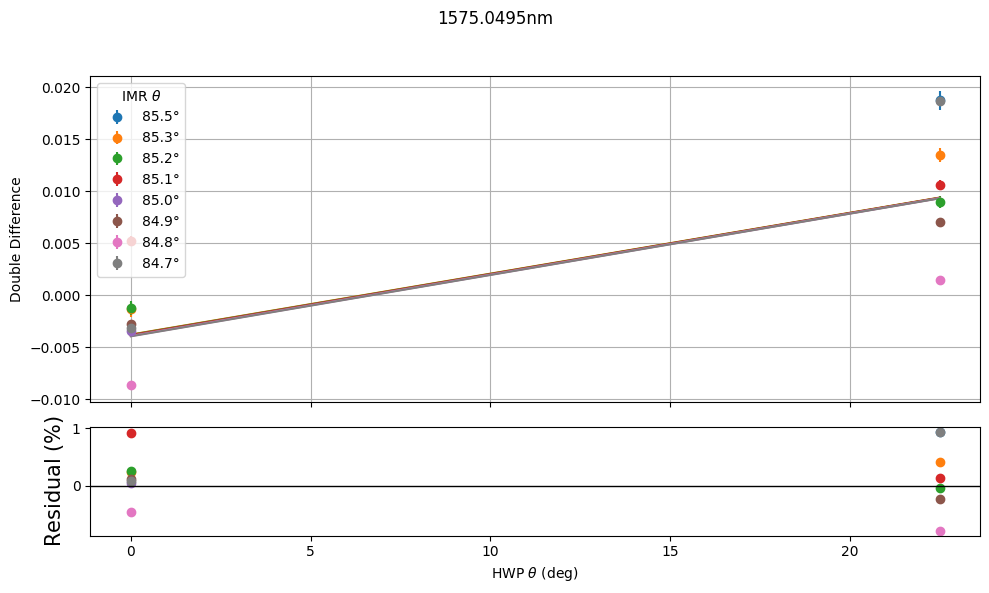

Updated Mueller Matrix:
[[ 0.5020639  -0.13067027 -0.4815927   0.00069112]
 [-0.49900547  0.13141549  0.48455895 -0.00069539]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.7895521988156858 0.9340129524865102
Error: [1.60448249e-03 4.09085779e+00]
s_res: 0.5873664723219374
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0950e+03                                    6.83e+04    
       1              2         1.0444e+03      5.07e+01       3.74e-02       5.54e+02    
       2              3         1.0416e+03      2.77e+00       7.54e-02       5.42e+02    
       3              4         1.0362e+03      5.38e+00       1.51e-01       5.16e+02    
       4              5         1.0261e+03      1.01e+01       2.99e-01       8.87e+02    
       5              6         1.0086e+03      1.76e+01       5.93e-01       1.53e+03    
       

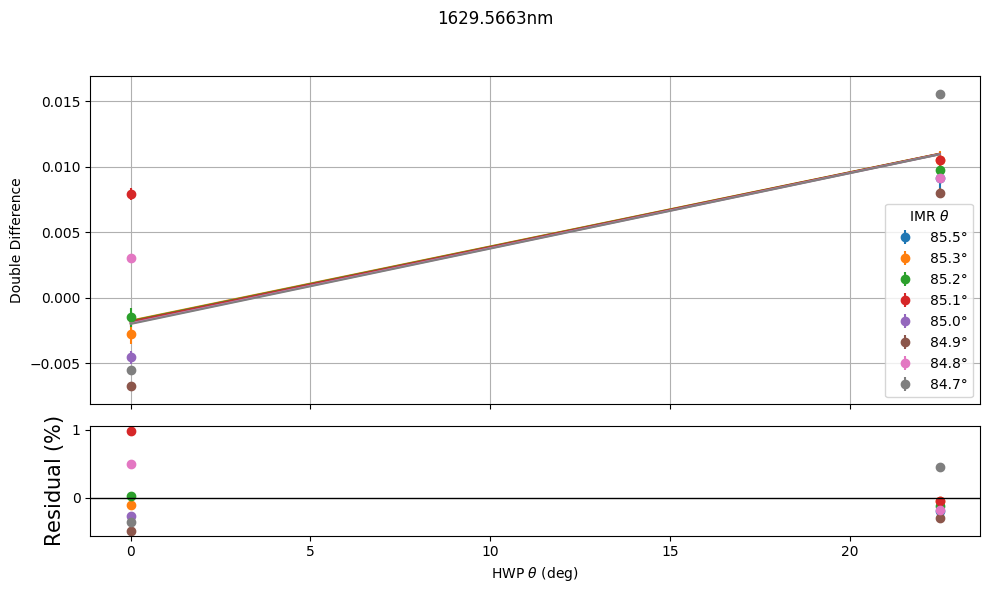

Updated Mueller Matrix:
[[ 0.50110184 -0.14815439 -0.47475856 -0.00195183]
 [-0.49734171  0.14919473  0.47837189  0.00196665]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.48317008449684484 0.9791860312631064
Error: [1.24117464e-03 2.82769220e+00]
s_res: 0.4302127027519095
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.7598e+02                                    2.08e+04    
       1              2         8.7080e+02      5.19e+00       3.67e-02       7.99e+01    
       2              3         8.7042e+02      3.74e-01       7.33e-02       7.23e+01    
       3              4         8.6978e+02      6.39e-01       1.46e-01       6.24e+01    
       4              5         8.6894e+02      8.47e-01       2.91e-01       7.88e+01    
       5              6         8.6866e+02      2.81e-01       2.84e-01       2.25e+01    
      

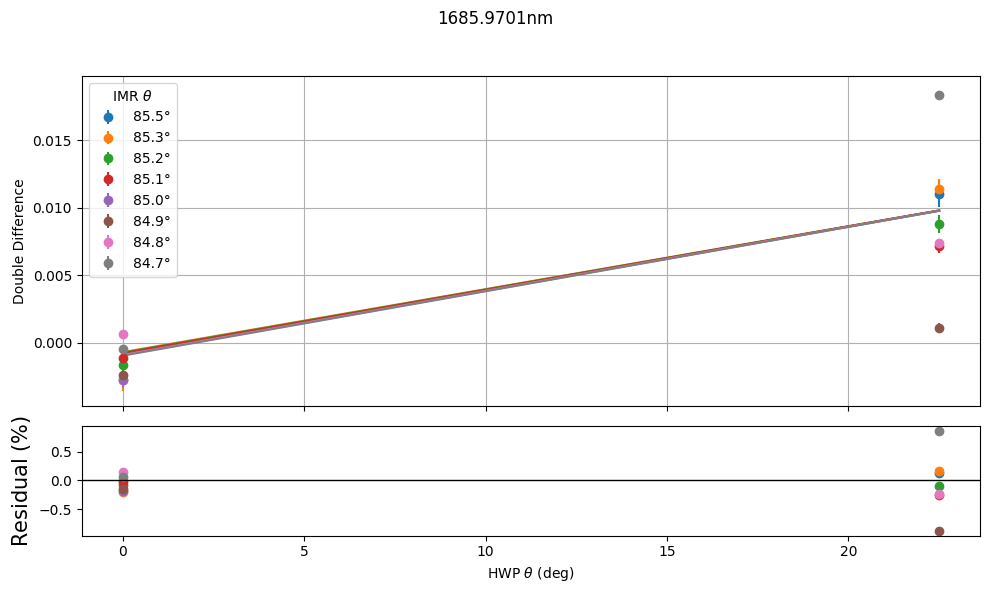

Updated Mueller Matrix:
[[ 0.50056782 -0.16140143 -0.47028177 -0.00355102]
 [-0.49721993  0.16242542  0.47346914  0.00357498]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.8734783665314553 0.861083169533029
Error: [1.22748243e-03 3.16433631e+00]
s_res: 0.40652863822819557
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0487e+03                                    2.40e+04    
       1              2         1.0386e+03      1.00e+01       3.56e-02       1.04e+03    
       2              3         1.0337e+03      4.97e+00       7.13e-02       1.03e+03    
       3              4         1.0238e+03      9.83e+00       1.42e-01       1.01e+03    
       4              5         1.0046e+03      1.93e+01       2.83e-01       1.93e+03    
       5              6         9.6757e+02      3.70e+01       5.61e-01       3.68e+03    
       

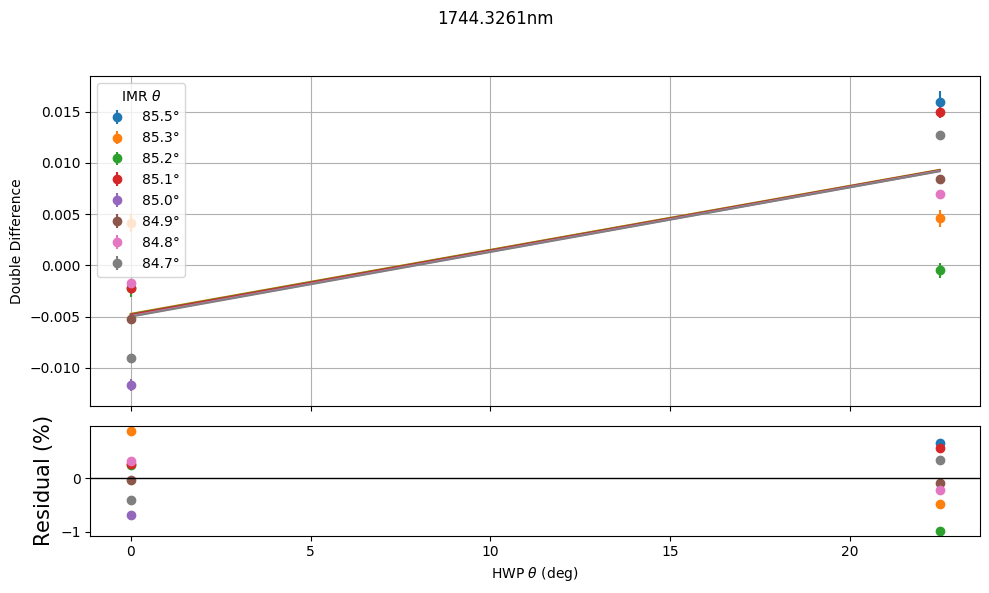

Updated Mueller Matrix:
[[ 0.50257973 -0.17337683 -0.4689775  -0.00579969]
 [-0.50003283  0.17421557  0.47138213  0.00582954]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.9789922782612839 0.8873231021940863
Error: [1.08237449e-03 2.71667608e+00]
s_res: 0.5859120096122782
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.7834e+03                                    2.67e+04    
       1              2         2.7730e+03      1.04e+01       3.43e-02       4.12e+02    
       2              3         2.7712e+03      1.88e+00       6.87e-02       4.06e+02    
       3              4         2.7675e+03      3.70e+00       1.37e-01       4.46e+02    
       4              5         2.7603e+03      7.16e+00       2.73e-01       8.60e+02    
       5              6         2.7469e+03      1.34e+01       5.40e-01       1.59e+03    
       

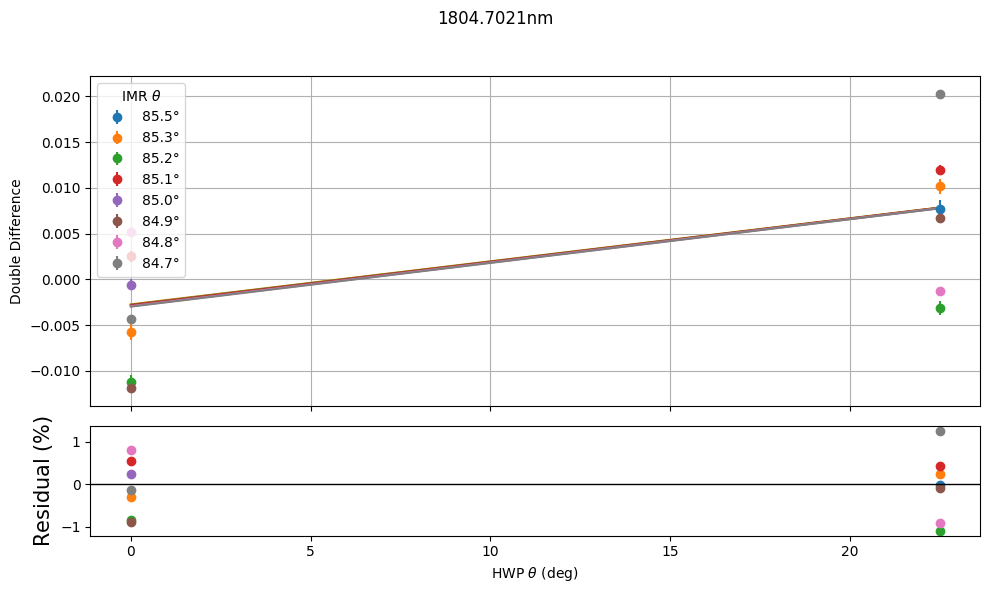

Updated Mueller Matrix:
[[ 0.50155186 -0.18234525 -0.4638045  -0.01049034]
 [-0.49847193  0.18342685  0.46668753  0.01055557]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -1.097304250348443 1.2530062513634128
Error: [2.33538576e-03 7.23081114e+00]
s_res: 0.7664186688669905
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.6677e+03                                    4.31e+04    
       1              2         2.6347e+03      3.30e+01       3.33e-02       1.41e+03    
       2              3         2.6284e+03      6.33e+00       6.73e-02       1.40e+03    
       3              4         2.6158e+03      1.26e+01       1.34e-01       1.38e+03    
       4              5         2.5909e+03      2.49e+01       2.67e-01       2.43e+03    
       5              6         2.5423e+03      4.86e+01       5.30e-01       4.70e+03    
       6

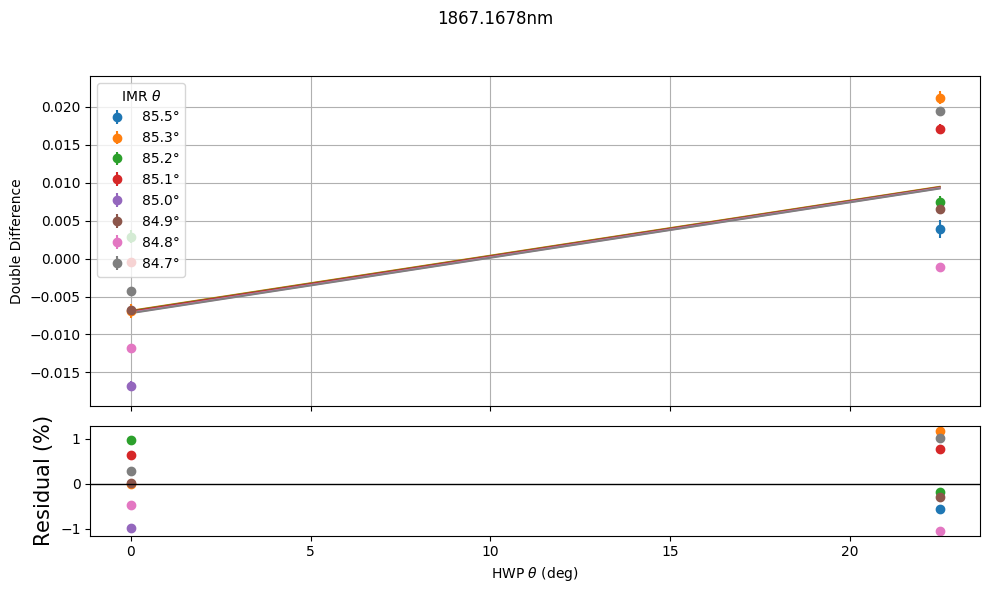

Updated Mueller Matrix:
[[ 0.50366598 -0.19095437 -0.46254322 -0.01488945]
 [-0.50063084  0.19205958  0.46536851  0.01498106]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -1.0386623466802258 1.1764800815228247
Error: [1.99095048e-03 4.60687828e+00]
s_res: 0.8080764442640841
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.3861e+02                                    1.53e+04    
       1              2         3.3467e+02      3.94e+00       3.27e-02       1.28e+01    
       2              3         3.3462e+02      4.80e-02       6.54e-02       9.10e+00    
       3              4         3.3457e+02      4.77e-02       1.31e-01       4.54e+00    
       4              5         3.3457e+02      1.90e-03       3.17e-02       1.68e-01    
       5              6         3.3457e+02      8.71e-09       3.05e-05       5.68e-03    
`ftol` 

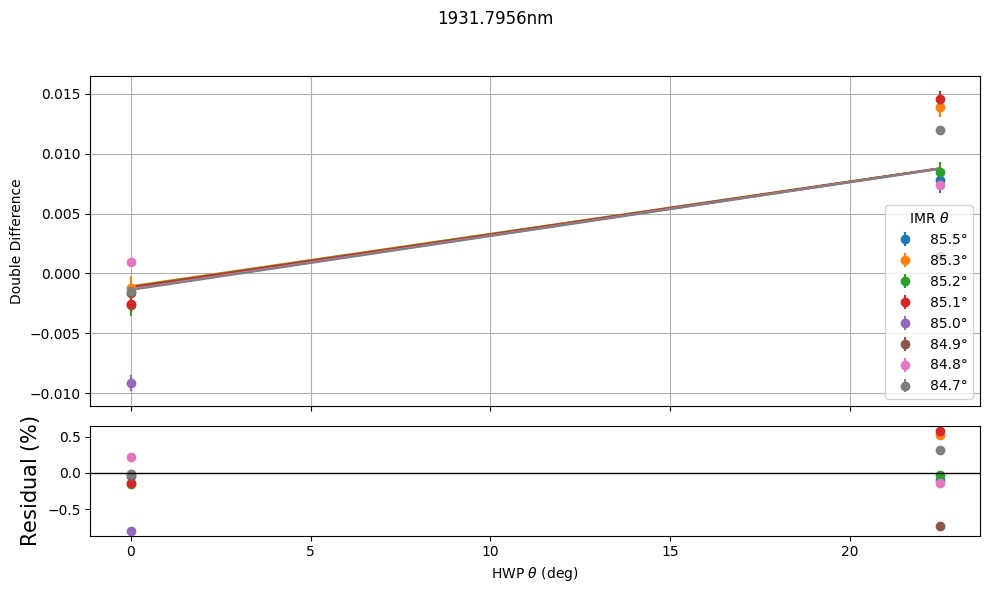

Updated Mueller Matrix:
[[ 0.50072777 -0.19306439 -0.45753128 -0.02377698]
 [-0.49716577  0.19438942  0.46083324  0.02394783]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.791520531310407 0.5789254014515451
Error: [9.18340744e-04 2.61685992e+00]
s_res: 0.42522497256999836
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.5222e+02                                    9.05e+04    
       1              2         4.0363e+02      1.49e+02       2.94e-02       6.91e+02    
       2              3         4.0070e+02      2.93e+00       6.36e-02       6.83e+02    
       3              4         3.9493e+02      5.78e+00       1.27e-01       6.67e+02    
       4              5         3.8369e+02      1.12e+01       2.53e-01       9.68e+02    
       5              6         3.6244e+02      2.12e+01       5.01e-01       1.82e+03    
       

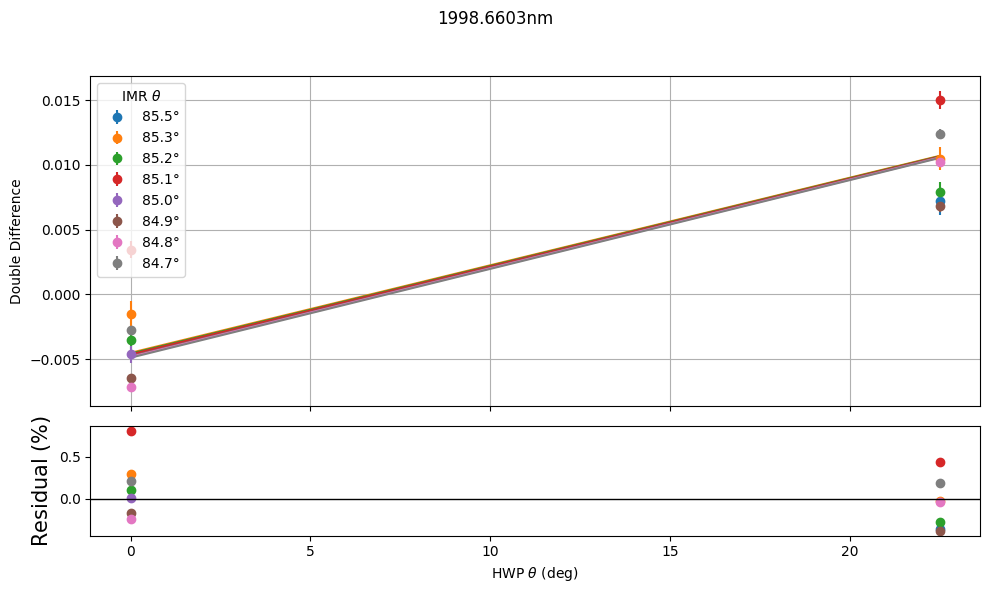

Updated Mueller Matrix:
[[ 0.50248971 -0.19834625 -0.45772128 -0.03398327]
 [-0.50000459  0.19928329  0.46001664  0.03415387]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.37593890479600767 0.8075918310648
Error: [7.57620901e-04 1.69494495e+00]
s_res: 0.3632948331726944
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.8299e+02                                    1.32e+04    
       1              2         3.7917e+02      3.83e+00       3.09e-02       2.24e+02    
       2              3         3.7825e+02      9.20e-01       6.18e-02       2.21e+02    
       3              4         3.7644e+02      1.80e+00       1.23e-01       2.14e+02    
       4              5         3.7298e+02      3.46e+00       2.46e-01       4.03e+02    
       5              6         3.6662e+02      6.36e+00       4.87e-01       7.34e+02    
       6 

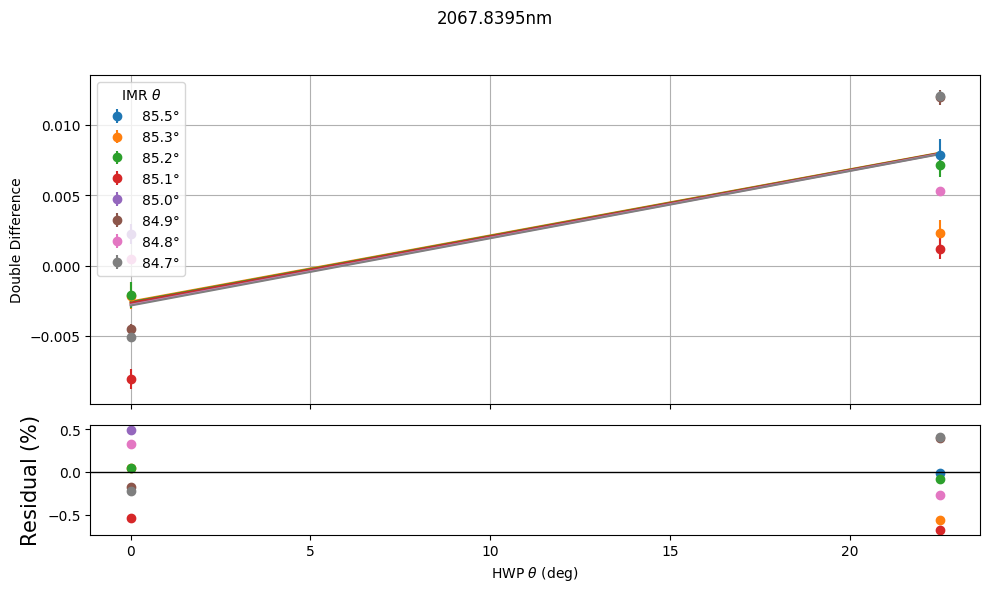

Updated Mueller Matrix:
[[ 0.50144288 -0.19791164 -0.45305389 -0.04655708]
 [-0.49658241  0.19977665  0.45751884  0.04701545]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.6763757117946376 0.49028054883787203
Error: [9.91895531e-04 3.01276135e+00]
s_res: 0.41687615022220376
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.5011e+02                                    6.70e+04    
       1              2         1.5515e+02      9.50e+01       2.82e-02       1.92e+02    
       2              3         1.5505e+02      1.01e-01       6.01e-02       2.30e+01    
       3              4         1.5489e+02      1.55e-01       1.20e-01       1.54e+01    
       4              5         1.5476e+02      1.30e-01       2.39e-01       9.80e+00    
       5              6         1.5476e+02      2.66e-04       1.12e-02       1.95e-02    
     

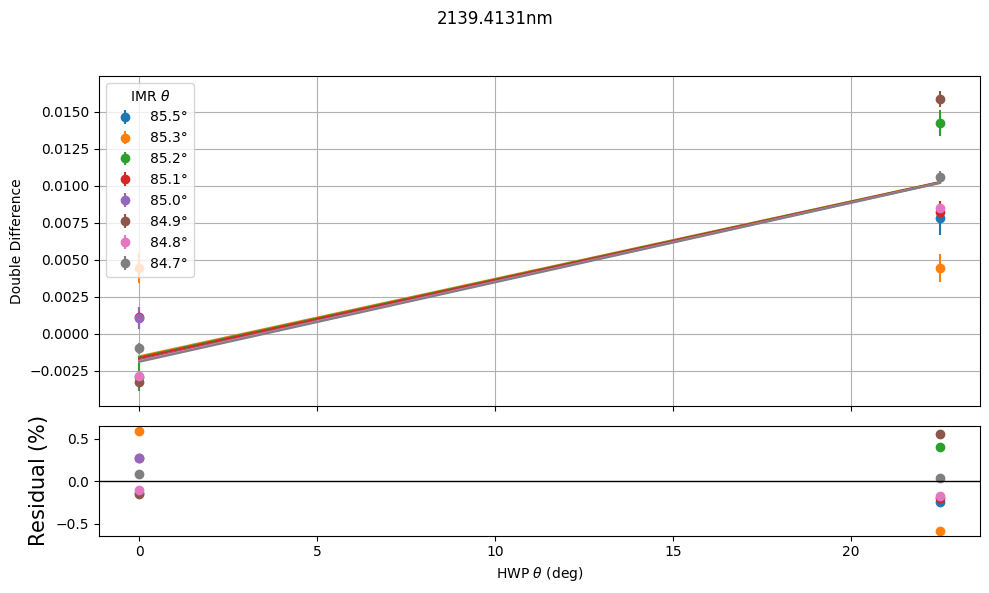

Updated Mueller Matrix:
[[ 0.50095707 -0.19839388 -0.45050154 -0.0616893 ]
 [-0.49610162  0.20024259  0.45495017  0.06229541]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.5826873774825938 0.5972752300700916
Error: [7.04341028e-04 1.69300172e+00]
s_res: 0.37170637207855856
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.2850e+02                                    1.41e+04    
       1              2         5.2332e+02      5.18e+00       2.91e-02       4.67e+02    
       2              3         5.2150e+02      1.82e+00       5.84e-02       4.64e+02    
       3              4         5.1789e+02      3.61e+00       1.16e-01       4.56e+02    
       4              5         5.1078e+02      7.11e+00       2.32e-01       8.64e+02    
       5              6         4.9700e+02      1.38e+01       4.61e-01       1.66e+03    
      

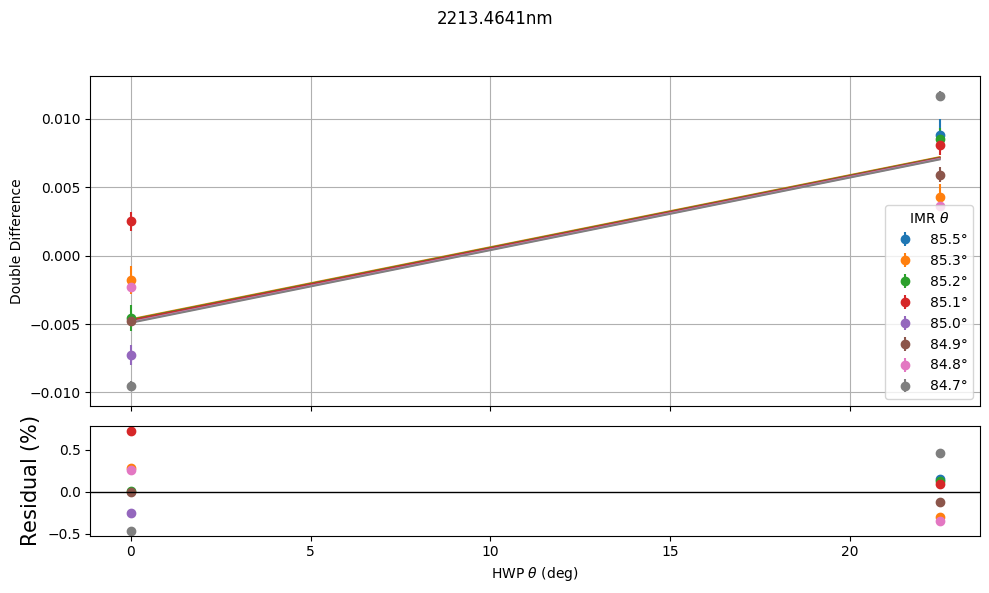

Updated Mueller Matrix:
[[ 0.50244698 -0.1951472  -0.44804239 -0.07745776]
 [-0.49479664  0.19806158  0.45501166  0.07866744]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.4626795767910129 0.7254982175964331
Error: [9.82993086e-04 3.08244419e+00]
s_res: 0.3610372466499541
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1970e+03                                    4.86e+04    
       1              2         1.1463e+03      5.07e+01       2.73e-02       2.38e+02    
       2              3         1.1454e+03      8.96e-01       5.67e-02       2.34e+02    
       3              4         1.1437e+03      1.76e+00       1.13e-01       2.27e+02    
       4              5         1.1403e+03      3.39e+00       2.26e-01       3.57e+02    
       5              6         1.1340e+03      6.28e+00       4.48e-01       6.56e+02    
       

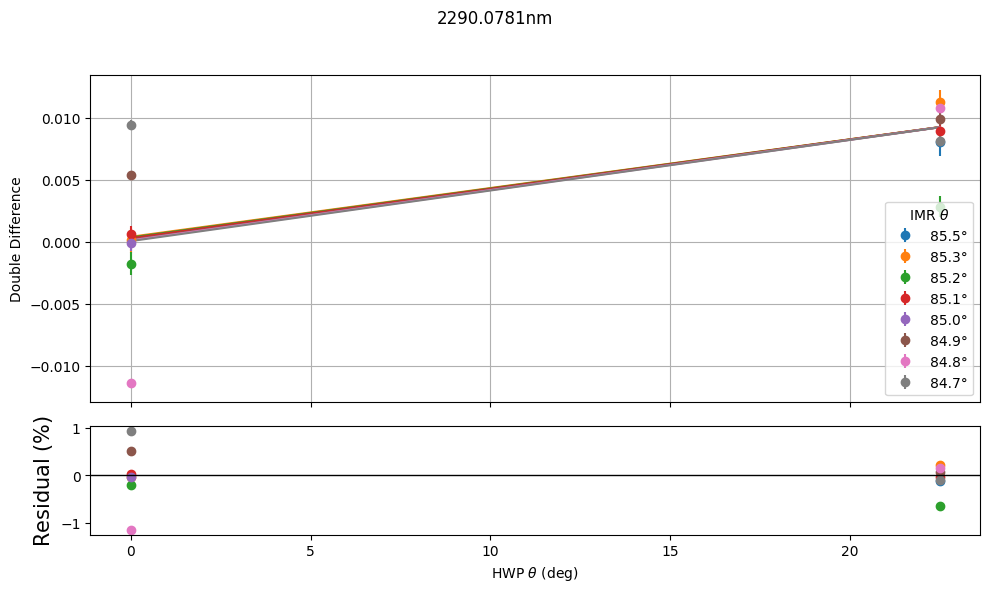

Updated Mueller Matrix:
[[ 0.4999501  -0.19116493 -0.44062317 -0.09922036]
 [-0.49044534  0.19470039  0.44923393  0.10114284]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -1.1528405016884882 0.9397953151488775
Error: [1.89581663e-03 5.08826651e+00]
s_res: 0.5255616636079453
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0933e+04                                    1.64e+03    
       1              2         1.0930e+04      2.68e+00       2.74e-02       1.44e+03    
       2              3         1.0925e+04      5.26e+00       5.47e-02       1.43e+03    
       3              4         1.0914e+04      1.05e+01       1.09e-01       1.48e+03    
       4              5         1.0893e+04      2.11e+01       2.18e-01       2.94e+03    
       5              6         1.0851e+04      4.26e+01       4.32e-01       5.79e+03    
       

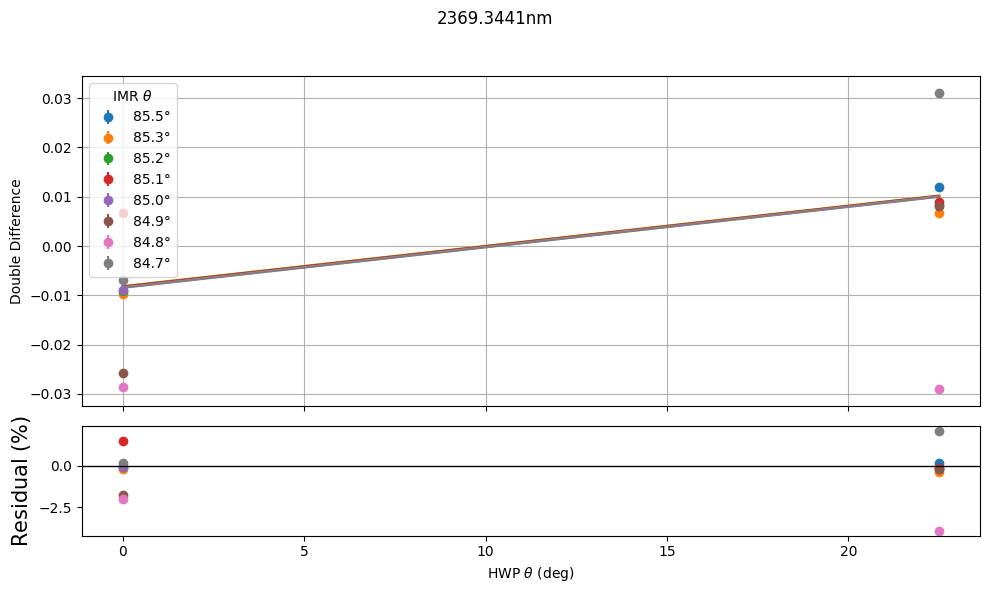

Updated Mueller Matrix:
[[ 0.50418189 -0.19608967 -0.43477386 -0.10147122]
 [-0.48762078  0.20242125  0.44966946  0.1049787 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -3.9057191414233796 2.1063331681354494
Error: [5.36832635e-03 1.11290076e+01]
s_res: 1.633677611225874


In [2]:
# all bins
sres_list = []
error_list = []
for bin in range(22):
    fp = f'datacsvs/onsky_csvs/HD25532/bin{bin}.csv'
    error,fig, ax,sres = fit_CHARIS_Mueller_matrix_by_bin_m3(Path(fp), bin, 
        Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/m3_diat_w_offset/bin{bin}.json'),
        )
    sres_list.append(sres)
    error_list.append(error)

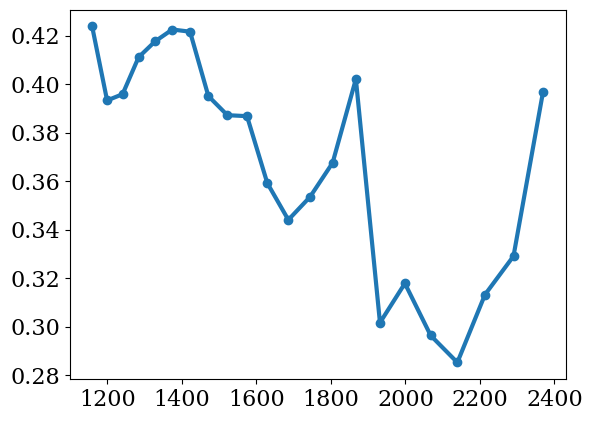

In [ ]:
# 2 stars
plt.plot(wavelength_bins,sres_list,'o-')

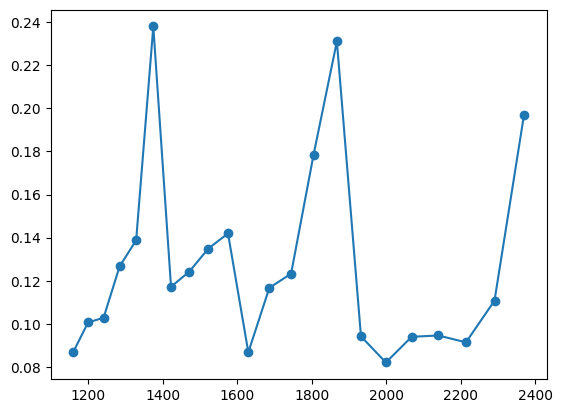

In [ ]:
# 1 star w delta theta
plt.plot(wavelength_bins,sres_list,'o-')

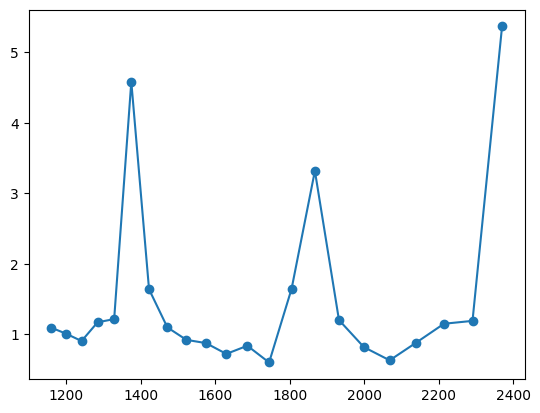

In [30]:
# noisy star delta theta
plt.plot(wavelength_bins,sres_list,'o-')

Text(0.5, 1.0, 's_abs for HD25532')

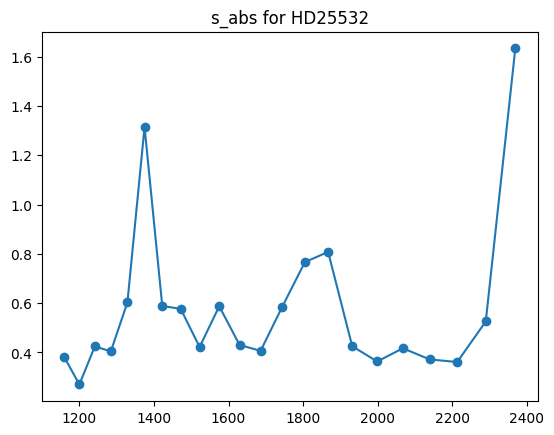

In [4]:
# noisy star delta theta better bins
plt.plot(wavelength_bins,sres_list,'o-')
plt.title('s_abs for HD25532')

In [18]:
from vampires_calibration.csv_tools import model_data
jsondir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/m3_diat_less_stars'
df = model_data(Path(jsondir))
df

,wavelength_bin,M3_delta_theta,M3_epsilon
0,1159.5614,7.817694,0.015555
1,1199.6971,8.605196,0.014806
2,1241.2219,8.337586,0.014518
3,1284.1840,9.114570,0.013981
4,1328.6331,9.943145,0.013462
5,1374.6208,10.197415,0.012027
6,1422.2002,9.005272,0.012782
7,1471.4264,10.884304,0.011623
8,1522.3565,11.218486,0.011136
9,1575.0495,10.907272,0.011293


In [15]:
errors=np.array(error_list)
errors1 = np.mean(errors[:,0])
errors2 = np.mean(errors[:,1])
print(errors1,errors2)

0.00017862185505378422 0.4783276155760076


In [17]:
# refine model
def phys_model_chisq(p0, wavelengths, diat_m3,errors_m3):
    """
    Calculate the chi squared for the physical model of CHARIS.
    
    Parameters:
    -----------
    p0 : list
        List of parameters [m1,b1,m2,b2].
    
    wavelengths : numpy array
        Array of wavelengths that are in the data.

    diat_m3 : float
        Diattenuation of the M3 mirror at the given wavelengths.
    
    errors_m3 : numpy array
        Array of errors for the M3 diattenuation.

    Returns:
    --------
    float
        The chi squared value.
    """
    # Get model diat
    model_diat = M3_diattenuation(wavelengths, p0[0],p0[1],p0[2],p0[3])

    # Calculate residual

    residuals_m3 = (model_diat - diat_m3) / errors_m3

    # Calculate chisq
    chisq_m3 = np.sum(residuals_m3**2)
    return chisq_m3


In [21]:
from scipy.optimize import minimize
from vampires_calibration.fitting import update_p0
# define bounds
p0 = [2.104,14.2,2.1,13.2]
m1_b = (0.8*p0[0],1.2*p0[0])
b1_b = (0.8*p0[1],1.2*p0[1])
m2_b = (0.8*p0[2],1.2*p0[2])    
b2_b = (0.8*p0[3],1.2*p0[3])
m3_diat = df['M3_epsilon'].values
bounds = [m1_b, b1_b, m2_b, b2_b]

# iterative fitting
iteration = 1
previous_chisq = 1000000
new_chisq = 0

while abs(previous_chisq-new_chisq)> 0.01*abs(previous_chisq):
        previous_chisq = new_chisq
        result = minimize(phys_model_chisq,p0, args=(wavelength_bins,m3_diat,errors1), bounds=bounds)
        p0 = result.x
        new_chisq = result.fun
        iteration += 1
        print(result)

# get error from covariance matrix
covariance_matrix = result.hess_inv.todense()
errors_phys = np.sqrt(np.diag(covariance_matrix))
print("Final Parameters:")
print(p0)
print("Final Errors:")
print(errors_phys)





  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 137.2782767605274
        x: [ 1.807e+00  1.373e+01  1.793e+00  1.374e+01]
      nit: 149
      jac: [ 1.968e-01 -1.533e-01 -8.870e-02 -1.309e-01]
     nfev: 1010
     njev: 202
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 137.27827675641066
        x: [ 1.807e+00  1.373e+01  1.793e+00  1.374e+01]
      nit: 1
      jac: [-2.618e-01 -6.982e-02  5.718e-02 -1.528e-01]
     nfev: 15
     njev: 3
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
Final Parameters:
[ 1.80661155 13.73356836  1.79301933 13.73786266]
Final Errors:
[1. 1. 1. 1.]
